In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel('C:/Users/ASUS/Documents/Exam_1_Cuantitativo/data_exam1.xlsx')

In [5]:
df.head(5)

,Y,X,Ind
0,66.199147,12.653765,0
1,44.311301,8.204418,0
2,48.390783,8.768596,0
3,58.087413,16.169568,1
4,60.708671,9.980310,0


In [6]:
list(df.columns)

['Y', 'X', 'Ind']

In [7]:
df.isna().sum()

Y      0
X      0
Ind    0
dtype: int64

In [8]:
df.dtypes

Y      float64
X      float64
Ind      int64
dtype: object

In [9]:
diver_cob = df.groupby('Ind').count().reset_index()
diver_cob

,Ind,Y,X
0,0,800,800
1,1,200,200


In [10]:
#agrupar los datos de acuerdo a los valores de una o varias columnas y crear grupos separados para cada valor. 
df.groupby('Ind').describe()


Y                                                                    \
     count       mean        std        min        25%        50%        75%   
Ind                                                                            
0    800.0  49.567376  23.594228 -34.894319  32.993351  49.562809  65.509785   
1    200.0  36.499253   8.214723   8.663725  31.619189  36.079339  41.560675   

                     X                                                      \
            max  count       mean       std       min       25%        50%   
Ind                                                                          
0    135.542574  800.0   9.931600  4.055795 -4.263757  7.281930   9.873947   
1     58.087413  200.0  10.157892  2.232061  3.821281  8.865269  10.118529   

                           
           75%        max  
Ind                        
0    12.661513  25.628678  
1    11.654149  16.169568

la cantidad de veces que cada valor único en la columna "Ind" aparece en el DataFrame "df". 

In [11]:
print(df["Ind"].value_counts())

0    800
1    200
Name: Ind, dtype: int64


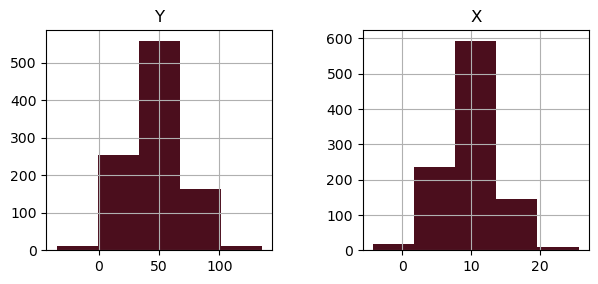

In [12]:
## generar un histograma de las variables numéricas 
dfhist = df.drop("Ind", axis = 1)
dfhist.hist(bins = 5 , figsize = (7,2 ), color='#4b0e1d')
plt.subplots_adjust(
                    bottom=0.1   ,
                    top=1.2 ,
                    wspace=0.4,
                    hspace=0.4)
plt.show()
    

Aparentemente son muy 'normales' y poseen poca variabilidad

## Ajustar un modelo de regresión lineal simple utilizando la biblioteca StatsModels 

In [13]:
import statsmodels.api as sm

### Ejecutando un modelo lineal (Regresion Simple)
X = sm.add_constant(df['X'])
model = sm.OLS(df['Y'], X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     2246.
Date:                Fri, 12 May 2023   Prob (F-statistic):          1.11e-257
Time:                        16:13:40   Log-Likelihood:                -3922.2
No. Observations:                1000   AIC:                             7848.
Df Residuals:                     998   BIC:                             7858.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6864      1.097     -1.537      0.1

En la tabla de resultados, podemos ver que la variable independiente (predictor) X tiene un coeficiente de regresión estimado de 4.8753 y un valor p muy pequeño (menor que 0.05), lo que indica que es un predictor significativo de la variable dependiente (respuesta) Y. También podemos ver que la constante tiene un coeficiente de regresión estimado de -1.6864 y un valor p de 0.125, lo que indica que no es un predictor significativo de Y.

Además, podemos ver que el modelo tiene un valor R cuadrado de 0.692, lo que significa que alrededor del 69.2% de la variación en la variable dependiente Y puede explicarse por la variable independiente X. La estadística F tiene un valor muy grande (2246) y un valor p muy pequeño (menor que 0.05), lo que indica que el modelo en su conjunto es significativo.

In [14]:
'''
Este código utiliza la función shapiro de la biblioteca scipy.stats para realizar una prueba de normalidad 
en los residuos del modelo de regresión lineal ajustado previamente (results.resid).
'''
import scipy.stats as scp
scp.shapiro(results.resid)

ShapiroResult(statistic=0.9877251982688904, pvalue=2.0074323003882455e-07)

El resultado de la prueba de Shapiro el valor estadístico de la prueba (0.9877251982688904) y un valor p (2.0074323003882455e-07). Este valor p indica la probabilidad de que los residuos se distribuyan normalmente. En este caso, el valor p es muy pequeño (menor que 0.05), lo que sugiere que los residuos no se distribuyen normalmente y, por lo tanto, el supuesto de normalidad de los errores no se cumple.

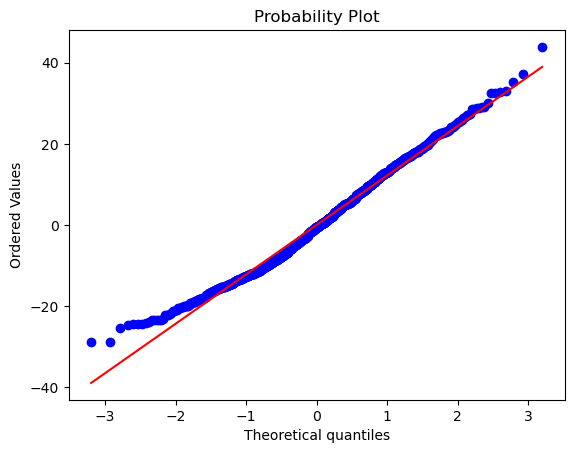

In [15]:
#### Graficamos y efectivamenteeeee algo pasa en los extremos de los residuos

import scipy.stats as scp
scp.shapiro(results.resid)
from scipy.stats  import probplot
import pylab
probplot(results.resid, dist = "norm", plot = pylab)
plt.show()

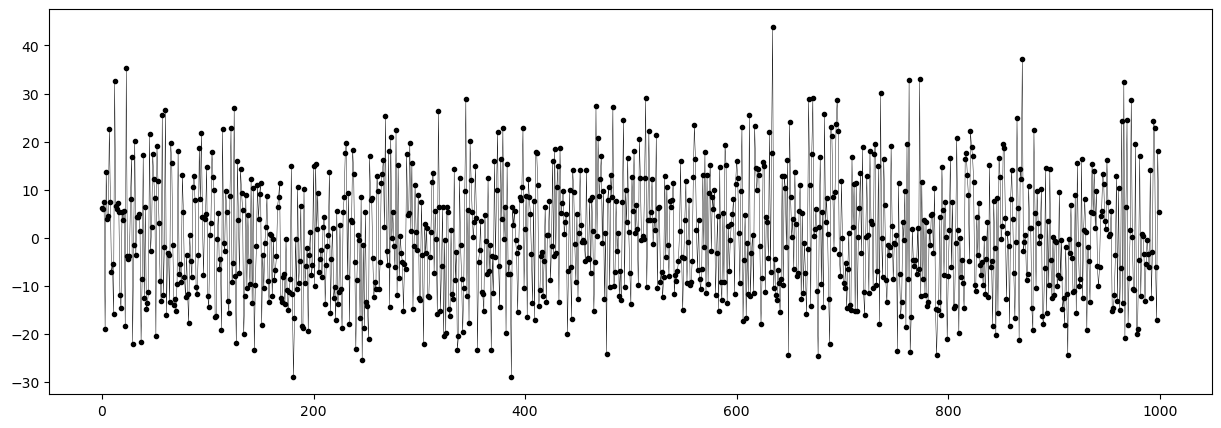

In [27]:
'''
prueba de heterocedasticidad 
'''
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
### H0: E_i son homocedasticos 
### H1: E_i no son homocedasticos (Son heterosedasticos) 


plt.figure(figsize = (15, 5))
plt.plot(results.resid, '.-', color = "black", linewidth = 0.3)

El resultado de la prueba es una lista de cuatro elementos que contienen el estadístico de Lagrange multiplicador, el valor p asociado, el valor F y el valor p correspondiente.

Además, el código genera un gráfico de los residuos (results.resid) a lo largo del tiempo, donde se puede visualizar la presencia de alguna estructura en los residuos.

In [17]:
test = sms.het_breuschpagan(results.resid, results.model.exog)
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
lzip(name, test)

[('Lagrange multiplier statistic', 14.244822398086775),
 ('p-value', 0.00016050175386760944),
 ('f-value', 14.421768281121576),
 ('f p-value', 0.00015492414453147397)]

La prueba de Breusch-Pagan muestra que el valor p es menor que el nivel de significancia del 5%, lo que sugiere que hay evidencia suficiente para rechazar la hipótesis nula de homocedasticidad. Es decir, los residuos del modelo no tienen varianzas iguales y, por lo tanto, el modelo lineal no es el más adecuado para ajustar los datos.

## Diferencias entre Ind 1 y 0

<AxesSubplot:xlabel='X', ylabel='Y'>

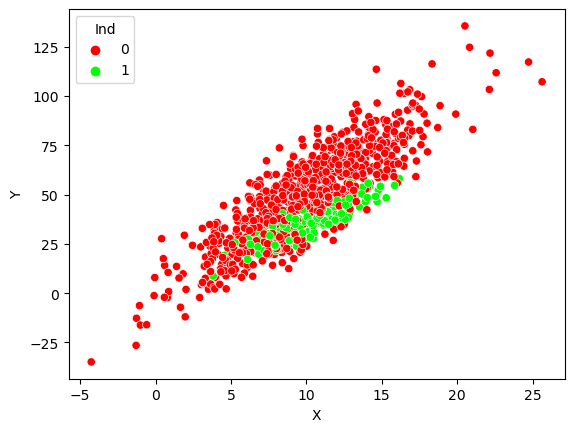

In [18]:
###   Ahora miramos si hay diferencias entre los Ind 1 y 0
import seaborn as sns
custom_palette = ["#FF0000", "#00FF00"] # Replace with your desired colors
sns.set_palette(custom_palette)
df["Ind"] = pd.Categorical(df["Ind"])
sns.scatterplot(data=df, x='X', y='Y', hue="Ind")

In [19]:
# create interaction term

df['Ind'] = df['Ind'].astype('int64')  # convert back to numerical variable
df['Ind*X'] = df['Ind'] * df['X']

# create model with interaction term
M_interaction = sm.add_constant(df[['Ind', 'X', 'Ind*X']])
model_interaction = sm.OLS(df['Y'], M_interaction)
results_interaction = model_interaction.fit()
print(results_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     1081.
Date:                Fri, 12 May 2023   Prob (F-statistic):          1.34e-312
Time:                        16:13:41   Log-Likelihood:                -3787.5
No. Observations:                1000   AIC:                             7583.
Df Residuals:                     996   BIC:                             7603.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4991      1.001     -0.498      0.6

In [20]:
df["Ind"] = pd.Categorical(df["Ind"])
Ind1 = df[df["Ind"] == 1].drop("Ind*X", axis=1)
Ind0 = df[df["Ind"] == 0].drop("Ind*X", axis=1)

 Y = -0.4991 + 4.5491Ind + 5.0411X - 1.8466IndX

In [21]:
X = sm.add_constant(Ind0['X'])
model0 = sm.OLS(Ind0['Y'], X)
results0 = model0.fit()
print(results0.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     2406.
Date:                Fri, 12 May 2023   Prob (F-statistic):          4.46e-243
Time:                        16:13:41   Log-Likelihood:                -3107.5
No. Observations:                 800   AIC:                             6219.
Df Residuals:                     798   BIC:                             6228.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4991      1.102     -0.453      0.6

In [22]:
import scipy.stats as scp
scp.shapiro(results0.resid)


ShapiroResult(statistic=0.9984009265899658, pvalue=0.6834418177604675)

-0.4990969581235758 5.041128533994831


Text(0.5, 1.0, 'Base on Ind 0')

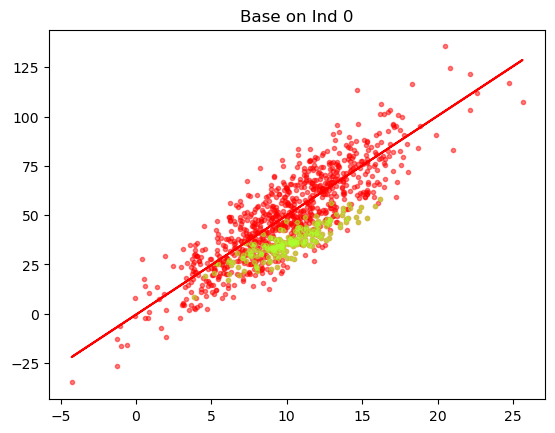

In [23]:
b0 = results0.params[0]
b1 = results0.params[1]

y_hat = b0 + b1 * Ind0["X"]

print(b0, b1)
plt.plot(df["X"],df["Y"], '.', alpha = 0.5) ## Estamos graficando los puntos originales
plt.plot(Ind1["X"],Ind1["Y"], '.', alpha = 0.5, color ='#ADFF2F')
y_hat = b0 + b1 * df["X"] ### Calculamos los y de nuestro modelo lineal
plt.plot(df["X"], y_hat, color ='red') ### Ploteamos nuestra recta de regresion
plt.title("Base on Ind 0")

In [24]:
X = sm.add_constant(Ind1['X'])
model1 = sm.OLS(Ind1['Y'], X)
results1 = model1.fit()
print(results1.summary())

import scipy.stats as scp
scp.shapiro(results1.resid)


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     604.9
Date:                Fri, 12 May 2023   Prob (F-statistic):           4.17e-62
Time:                        16:13:41   Log-Likelihood:                -564.47
No. Observations:                 200   AIC:                             1133.
Df Residuals:                     198   BIC:                             1140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0500      1.351      2.999      0.0

ShapiroResult(statistic=0.9939124584197998, pvalue=0.5876953601837158)

-0.4990969581235758 5.041128533994831 Ind 0
4.049984263569874 3.194488514791987 Ind 1


C:\Users\ASUS\AppData\Local\Temp\ipykernel_16112\1997619793.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(Ind0["X"],Ind0["Y"], '.', alpha = 0.5, color ='#FF7F50', label ='Ind 0', marker = 'o')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16112\1997619793.py:10: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(Ind1["X"],Ind1["Y"], '.', alpha = 0.5, color ='#ADFF2F', label ='Ind 1', marker = '.')


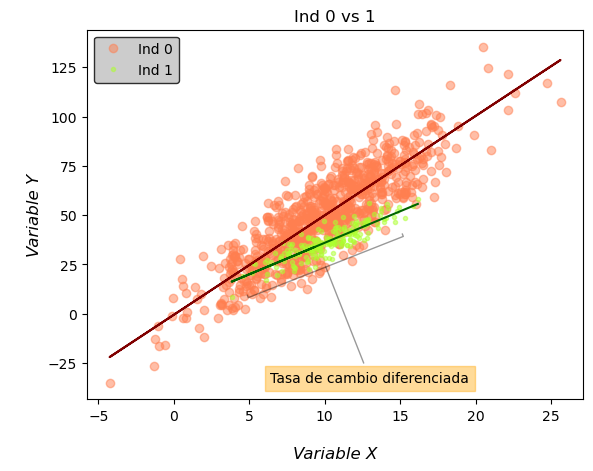

In [25]:
b0_1 = results1.params[0]
b1_1 = results1.params[1]

y_hat_1 = b0_1 + b1_1 * Ind1["X"]
print(b0, b1, "Ind 0")
print(b0_1, b1_1, "Ind 1")

plt.plot(df["X"],df["Y"], '.', alpha = 0.0002) 
plt.plot(Ind0["X"],Ind0["Y"], '.', alpha = 0.5, color ='#FF7F50', label ='Ind 0', marker = 'o')
plt.plot(Ind1["X"],Ind1["Y"], '.', alpha = 0.5, color ='#ADFF2F', label ='Ind 1', marker = '.')
plt.legend(facecolor = '#C0C0C0', edgecolor = 'black', loc = 'upper left')

y_hat = b0_1 + b1_1 * df["X"] 
plt.plot(Ind1["X"], y_hat_1, color ='#006400') 
plt.title('Evaluando individuos\n0 vs 1', fontsize = 15, color ='black', fontweight = 'bold',
         fontstyle = 'normal')

y_hat = b0 + b1 * df["X"] 
plt.plot(df["X"], y_hat, color ='#800000') #
plt.title("Ind 0 vs 1")
plt.savefig('figure.png', dpi=300)
##### Estetica
plt.xlabel('\nVariable X', fontsize=12, color= 'black', fontweight = 'normal',
          fontstyle = 'italic')
plt.ylabel('\nVariable Y', fontsize=12, color= 'black', fontweight = 'normal',
          fontstyle = 'italic')


plt.annotate("Tasa de cambio diferenciada", xy=(10, 25), xytext=(6.4, -35),
             arrowprops={'arrowstyle':'-[,widthB=6.0', 'color': 
                         'black', 'alpha':0.4},
             bbox={'pad':4, 'edgecolor':'orange', 'facecolor': 
                   'orange', 'alpha':0.4})

plt.savefig('table_1.png', dpi=300)

In [26]:
jupyter nbconvert /path/to/Question_1.ipynb --to latex

SyntaxError: invalid syntax (838603969.py, line 1)